The goal of this assignment is to use the Banknote authentication dataset to train a model that can predict if a banknote is genuine or not.  

Step 1: run K-means on the given dataset

Step 2: visualise the results. 

Step 3: re-run K-means several times and visualise the results. 

Step 4: compare the results: is the K-means algorithm stable? 

Step 5:  describe your results.

### Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA


from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("Banknote-authentication-dataset-.csv")

In [3]:
df

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [4]:
X = df.iloc[:,0:]

In [5]:
X.values

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

In [6]:
scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       ...,
       [-1.47235682, -2.62164576],
       [-1.40669251, -1.75647104],
       [-1.04712236, -0.43982168]])

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

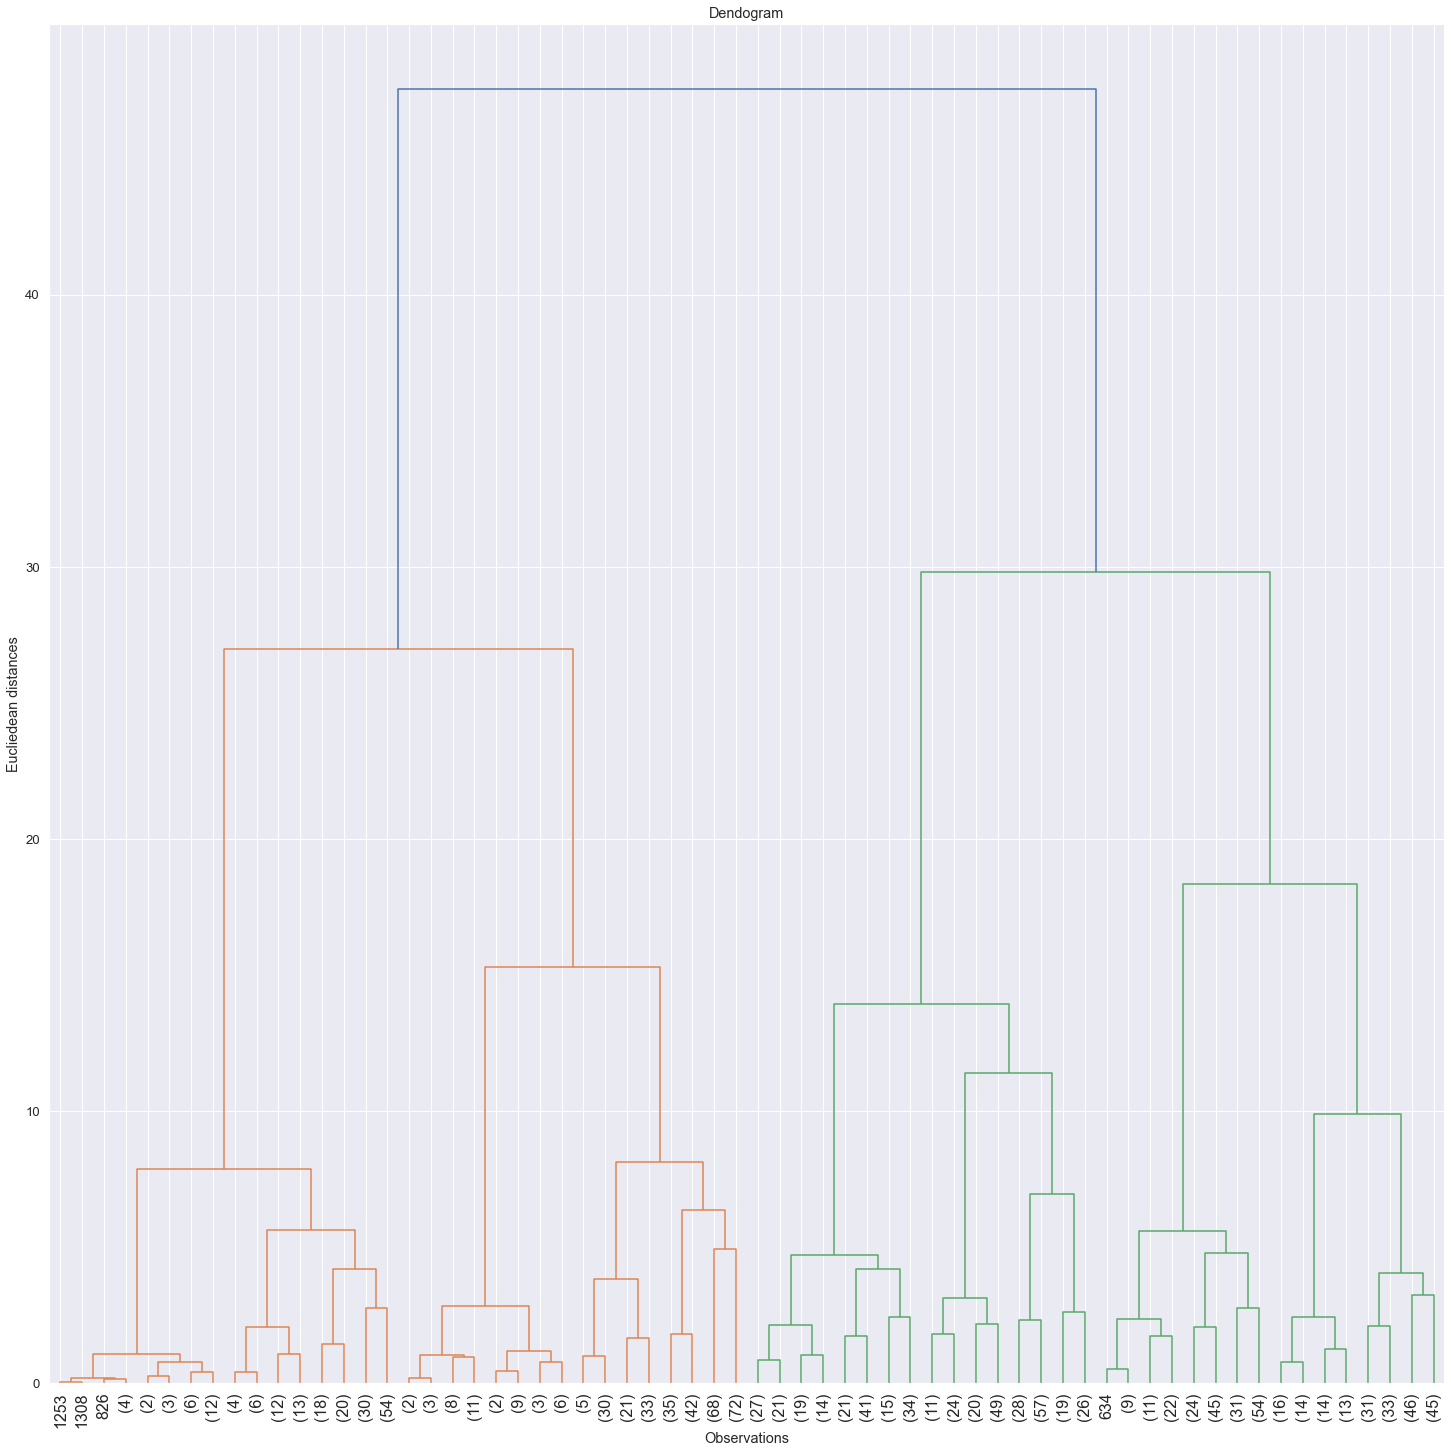

In [9]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'),truncate_mode='level',color_threshold=None,
                          p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [10]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [11]:
y_hc = hc.fit_predict(X_scaled)

In [12]:
y_hc

array([0, 0, 2, ..., 3, 3, 1], dtype=int64)

In [13]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [14]:
y

,Cluster
0,0
1,0
2,2
3,0
4,2
...,...
1367,2
1368,3
1369,3
1370,3


In [15]:
y['Cluster'].unique()

array([0, 2, 1, 3], dtype=int64)

In [16]:
y['Cluster'].value_counts()

2    426
0    409
1    350
3    187
Name: Cluster, dtype: int64

In [17]:
newdf = pd.concat([df,y],axis=1)

In [18]:
newdf

,V1,V2,Cluster
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,2
3,3.45660,9.52280,0
4,0.32924,-4.45520,2
...,...,...,...
1367,0.40614,1.34920,2
1368,-1.38870,-4.87730,3
1369,-3.75030,-13.45860,3
1370,-3.56370,-8.38270,3


In [19]:
meandf = newdf.groupby(by='Cluster').mean()

In [20]:
meandf

,V1,V2
Cluster,,
0,1.920602,8.441860
1,-2.229471,2.034346
2,2.487949,-0.038623
3,-2.513331,-8.079251


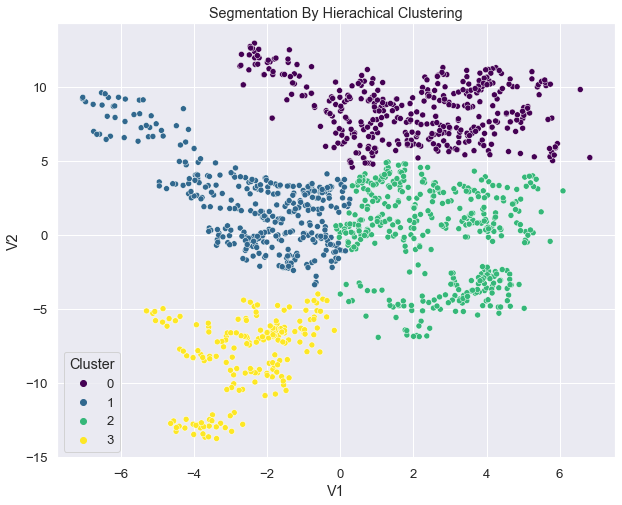

In [21]:
x_axis = newdf['V1']
y_axis = newdf['V2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=newdf['Cluster'],palette='viridis', data=newdf)
plt.title('Segmentation By Hierachical Clustering')
plt.show()

## K-Means Clustering

### Results Summary

I start with minimum n_clusters of 2, then gradually increase by 1 till n_clusters = 5. I found out that optimum clusters are at n=4 with clear separation still intact.

#### K-Means 2 clusters

In [22]:
model = KMeans(n_clusters=2, random_state=0)

In [23]:
model.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [24]:
labels = model.labels_

In [25]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
df["Labels"] = model.labels_

In [27]:
df

,V1,V2,Labels
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,0
3,3.45660,9.52280,0
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,0
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1


In [28]:
centroids = model.cluster_centers_

In [29]:
centroids

array([[ 0.65251795,  0.48171192],
       [-0.85718631, -0.63280537]])

In [30]:
a = pd.DataFrame(centroids)

In [31]:
a

,0,1
0,0.652518,0.481712
1,-0.857186,-0.632805


In [32]:
kmeans_result = df.copy()

In [33]:
kmeans_result

,V1,V2,Labels
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,0
3,3.45660,9.52280,0
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,0
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1


In [34]:
#kmeans_result.to_csv("kmeans_2.csv", index=False)

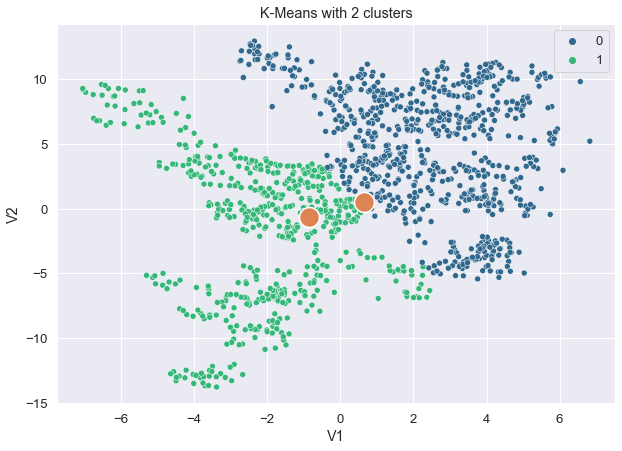

In [32]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=df["V1"], y=df["V2"], hue=df["Labels"], palette="viridis")

sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=400)
plt.title("K-Means with 2 clusters")

plt.show()

#### K-Means 3 clusters

In [33]:
model = KMeans(n_clusters=3, random_state=0)

In [34]:
model.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [35]:
labels = model.labels_

In [36]:
labels

array([0, 0, 0, ..., 1, 1, 2])

In [37]:
df["Labels"] = model.labels_

In [38]:
df

,V1,V2,Labels
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,0
3,3.45660,9.52280,0
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,2
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1


In [39]:
centroids = model.cluster_centers_

In [40]:
centroids

array([[ 0.91985155,  0.36352333],
       [-0.77463571, -1.51081709],
       [-0.71711507,  0.3225032 ]])

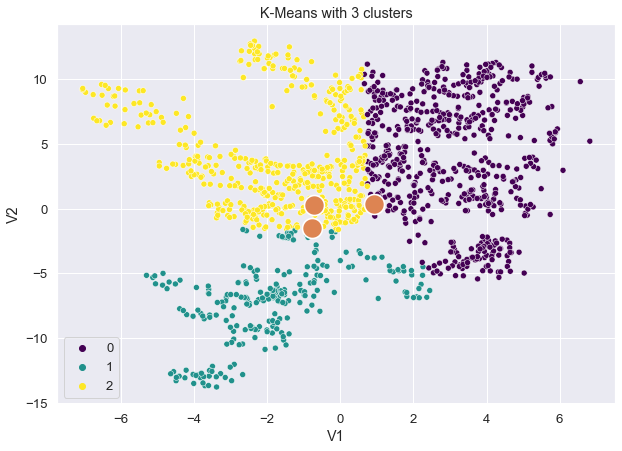

In [41]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=df["V1"], y=df["V2"], hue=df["Labels"], palette="viridis")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=400)
plt.title("K-Means with 3 clusters")

plt.show()

#### K-Means 4 clusters

In [42]:
model = KMeans(n_clusters=4, random_state=0)

In [43]:
model.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [44]:
labels = model.labels_

In [45]:
labels

array([1, 1, 3, ..., 0, 0, 2])

In [46]:
df["Labels"] = model.labels_

In [47]:
df

,V1,V2,Labels
0,3.62160,8.66610,1
1,4.54590,8.16740,1
2,3.86600,-2.63830,3
3,3.45660,9.52280,1
4,0.32924,-4.45520,3
...,...,...,...
1367,0.40614,1.34920,3
1368,-1.38870,-4.87730,0
1369,-3.75030,-13.45860,0
1370,-3.56370,-8.38270,0


In [48]:
centroids = model.cluster_centers_

In [49]:
centroids

array([[-1.02683912, -1.69144243],
       [ 0.68304308,  0.95192416],
       [-0.93286366,  0.2424991 ],
       [ 0.74415263, -0.45557248]])

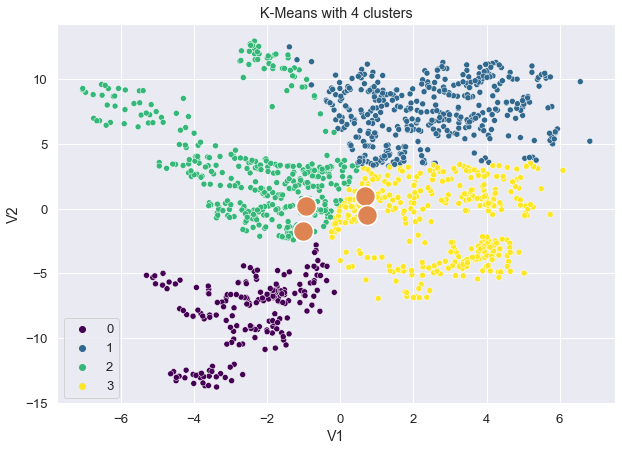

In [50]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=df["V1"], y=df["V2"], hue=df["Labels"], palette="viridis")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=400)
plt.title("K-Means with 4 clusters")

plt.show()

#### K-Means 5 clusters

In [51]:
model = KMeans(n_clusters=5, random_state=0)

In [52]:
model.fit(X_scaled)

KMeans(n_clusters=5, random_state=0)

In [53]:
labels = model.labels_

In [54]:
labels

array([1, 1, 4, ..., 0, 0, 2])

In [55]:
df["Labels"] = model.labels_

In [56]:
df

,V1,V2,Labels
0,3.62160,8.66610,1
1,4.54590,8.16740,1
2,3.86600,-2.63830,4
3,3.45660,9.52280,1
4,0.32924,-4.45520,2
...,...,...,...
1367,0.40614,1.34920,2
1368,-1.38870,-4.87730,0
1369,-3.75030,-13.45860,0
1370,-3.56370,-8.38270,0


In [57]:
centroids = model.cluster_centers_

In [58]:
centroids

array([[-1.0419044 , -1.71422944],
       [ 0.72107857,  0.97349834],
       [-0.44411883, -0.18542554],
       [-1.38937451,  0.99573736],
       [ 1.03401015, -0.48011317]])

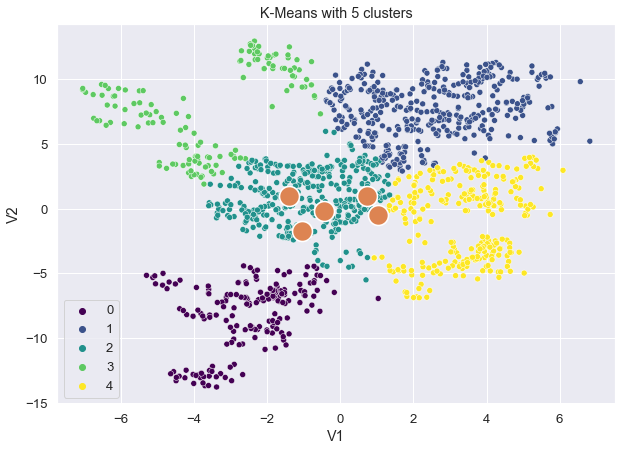

In [59]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=df["V1"], y=df["V2"], hue=df["Labels"], palette="viridis")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=400)
plt.title("K-Means with 5 clusters")

plt.show()

### Elbow Method

In [60]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

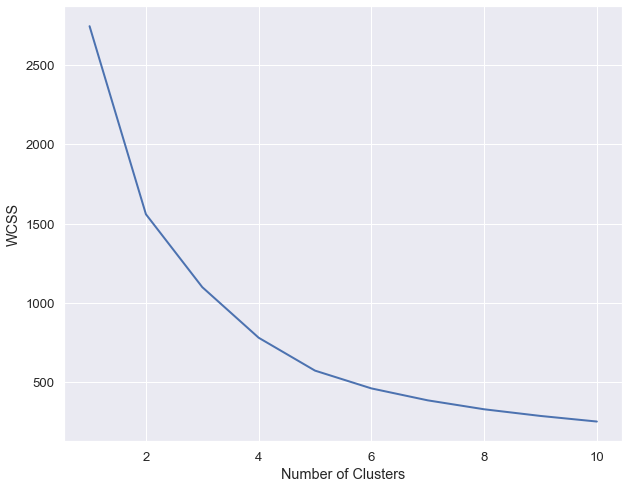

In [61]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [62]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)

In [63]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

### Results

In [64]:
df_segm_kmeans = df.copy()

In [65]:
df_segm_kmeans

,V1,V2,Labels
0,3.62160,8.66610,1
1,4.54590,8.16740,1
2,3.86600,-2.63830,4
3,3.45660,9.52280,1
4,0.32924,-4.45520,2
...,...,...,...
1367,0.40614,1.34920,2
1368,-1.38870,-4.87730,0
1369,-3.75030,-13.45860,0
1370,-3.56370,-8.38270,0


In [66]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [67]:
df_segm_kmeans

,V1,V2,Labels,Segment K-Means
0,3.62160,8.66610,1,0
1,4.54590,8.16740,1,0
2,3.86600,-2.63830,4,2
3,3.45660,9.52280,1,0
4,0.32924,-4.45520,2,2
...,...,...,...,...
1367,0.40614,1.34920,2,3
1368,-1.38870,-4.87730,0,1
1369,-3.75030,-13.45860,0,1
1370,-3.56370,-8.38270,0,1


In [68]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [69]:
df_segm_analysis

,V1,V2,Labels
Segment K-Means,,,
0,1.994411,8.460720,1.301235
1,-2.229301,-7.971184,0.260000
2,2.217767,-0.727954,3.297229
3,-1.749311,2.957058,2.118919


In [70]:
#df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means',0]].groupby(['Segment K-Means']).count()

In [71]:
#df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [72]:
#df_segm_analysis

In [73]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                         3: 'D'},inplace=True)

In [74]:
df_segm_analysis

,V1,V2,Labels
Segment K-Means,,,
A,1.994411,8.460720,1.301235
B,-2.229301,-7.971184,0.260000
C,2.217767,-0.727954,3.297229
D,-1.749311,2.957058,2.118919


In [75]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  3: 'D'})

In [76]:
df_segm_kmeans

,V1,V2,Labels,Segment K-Means
0,3.62160,8.66610,A,0
1,4.54590,8.16740,A,0
2,3.86600,-2.63830,C,2
3,3.45660,9.52280,A,0
4,0.32924,-4.45520,C,2
...,...,...,...,...
1367,0.40614,1.34920,D,3
1368,-1.38870,-4.87730,B,1
1369,-3.75030,-13.45860,B,1
1370,-3.56370,-8.38270,B,1


### Plot the clusters

In [77]:
x_axis = df_segm_kmeans[0]
y_axis = df_segm_kmeans[1]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

KeyError: 0

In [ ]:
x_axis = df_segm_kmeans['Edu']
y_axis = df_segm_kmeans['Age']
z_axis = df_segm_kmeans['Income']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

plt.show()

### Compare with original dataset - Class (target). Presumably 1 for genuine and 2 for forged

In [35]:
df2 = pd.read_csv("banknote.csv")

In [36]:
df2

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


In [37]:
df2.drop(["V3","V4"], axis=1, inplace=True)

In [38]:
df2

,V1,V2,Class
0,3.62160,8.66610,1
1,4.54590,8.16740,1
2,3.86600,-2.63830,1
3,3.45660,9.52280,1
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,2
1368,-1.38870,-4.87730,2
1369,-3.75030,-13.45860,2
1370,-3.56370,-8.38270,2


In [39]:
kmeans_result

,V1,V2,Labels
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,0
3,3.45660,9.52280,0
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,0
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1


In [40]:
kmeans_result.drop({"V1","V2"}, axis=1, inplace=True)

In [41]:
kmeans_result

,Labels
0,0
1,0
2,0
3,0
4,1
...,...
1367,0
1368,1
1369,1
1370,1


In [43]:
df3 = pd.concat([df2,kmeans_result], axis=1)

In [44]:
df3

,V1,V2,Class,Labels
0,3.62160,8.66610,1,0
1,4.54590,8.16740,1,0
2,3.86600,-2.63830,1,0
3,3.45660,9.52280,1,0
4,0.32924,-4.45520,1,1
...,...,...,...,...
1367,0.40614,1.34920,2,0
1368,-1.38870,-4.87730,2,1
1369,-3.75030,-13.45860,2,1
1370,-3.56370,-8.38270,2,1


In [49]:
df3["Class"].replace(to_replace=1, value=0, inplace=True)

In [51]:
df3["Class"].replace(to_replace=2, value=1, inplace=True)

In [52]:
df3

,V1,V2,Class,Labels
0,3.62160,8.66610,0,0
1,4.54590,8.16740,0,0
2,3.86600,-2.63830,0,0
3,3.45660,9.52280,0,0
4,0.32924,-4.45520,0,1
...,...,...,...,...
1367,0.40614,1.34920,1,0
1368,-1.38870,-4.87730,1,1
1369,-3.75030,-13.45860,1,1
1370,-3.56370,-8.38270,1,1


In [53]:
df3["Class"].value_counts()  #Actual dataset labels

0    762
1    610
Name: Class, dtype: int64

In [54]:
df3["Labels"].value_counts() #K-Means Results

0    776
1    596
Name: Labels, dtype: int64

In [55]:
df3.to_csv("compare.csv",index=False)